<a href="https://colab.research.google.com/github/VEVELANDIA/Prueba-DataScientist-VictorVelandia/blob/main/Prueba_de_conocimientos_II_DNE_Davivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets**

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 1. Análisis Exploratorio

En este a partado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [1]:
%%capture

#@title **Librerias**: Se instalan los paquetes e importan librerias necesarias para poder tomar los insumos desde Drive y para desarrollar el modelo predictivo
!pip install -U -q PyDrive
# !pip install --upgrade -q gspread
!pip install --upgrade xlrd
!pip install --upgrade -q pandas
!pip install -q openpyxl
!pip install gspread==5.1.1
!pip install -q xlsxwriter
!pip install pyxlsb
from google.colab import files
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import numpy    as np
import pandas   as pd
import datetime as dt
import gspread
from google.colab import auth
from google.auth import default
from openpyxl import load_workbook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pandas.tseries.offsets import MonthEnd
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

creds, _ = default()
gc = gspread.authorize(creds)


In [2]:
#@title El enlace para obtener la base de github está roto o no encuentra información
#!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"

In [3]:
#@title **Traer datos desde Drive**

# cuando es un archivo de csv se utiliza este codigo
downloaded = drive.CreateFile({'id': '18VZIJeHrx4azZ2RqSCrhYrmdrQFKkbWo'}) # replace the id with id of file you want to access
downloaded.GetContentFile('davivienda_tweets.csv')
Tweets= pd.read_csv('davivienda_tweets.csv')
Tweets

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...
...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1806,Banco Davivienda,@Davivienda,2021-12-22T18:26:38.000Z,Banco Davivienda\n@Davivienda\n·\n22 dic.,En respuesta a \n@JaimeMolina\nBuenas tardes. ...,NaN,1.0,NaN,NaN,[],https://twitter.com/Davivienda/status/14737216...
1807,1807,Banco Davivienda,@Davivienda,2021-12-22T20:18:40.000Z,Banco Davivienda\n@Davivienda\n·\n22 dic.,"En respuesta a \n@josefe71\nHola Jose , gracia...",NaN,1.0,NaN,NaN,[],https://twitter.com/Davivienda/status/14737498...
1808,1808,Banco Davivienda,@Davivienda,2021-12-22T17:54:45.000Z,Banco Davivienda\n@Davivienda\n·\n22 dic.,En respuesta a \n@gleniiaaa\nHola! Bienvenida ...,👋,NaN,NaN,NaN,[],https://twitter.com/Davivienda/status/14737136...
1809,1809,Banco Davivienda,@Davivienda,2021-12-22T11:45:13.000Z,Banco Davivienda\n@Davivienda\n·\n22 dic.,"En respuesta a \n@diegoruix\nBuenos días, Sr. ...",NaN,NaN,NaN,NaN,[],https://twitter.com/Davivienda/status/14736206...


In [4]:
#@title Se filtran los tweets quitando los realizados por Davivienda y dejando solo los de los usuarios, que es lo que nos interesa conocer
Tweets_usuarios = Tweets[Tweets['UserName'] != "@Davivienda"]
Tweets_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1566 entries, 0 to 1788
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1566 non-null   int64  
 1   UserScreenName  1562 non-null   object 
 2   UserName        1566 non-null   object 
 3   Timestamp       1566 non-null   object 
 4   Text            1566 non-null   object 
 5   Embedded_text   1566 non-null   object 
 6   Emojis          291 non-null    object 
 7   Comments        756 non-null    float64
 8   Likes           243 non-null    object 
 9   Retweets        625 non-null    object 
 10  Image link      1566 non-null   object 
 11  Tweet URL       1566 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 159.0+ KB


In [5]:
Tweets_usuarios = Tweets_usuarios.dropna(subset=['UserName', 'Timestamp','Text','Embedded_text'])
Tweets_usuarios

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...
...,...,...,...,...,...,...,...,...,...,...,...,...
1784,1784,NaN,@lssshhhhh,2021-12-22T20:28:18.000Z,@lssshhhhh\n·\n22 dic.,@Davivienda\n deberían tener personal capacita...,🖤 😡 😡 😡 😡 😡 😡 😡 😡 😡 😡 😡 😡,1.0,NaN,NaN,[],https://twitter.com/lssshhhhh/status/147375227...
1785,1785,LUISA,@milu_mejia22,2021-12-22T21:23:23.000Z,LUISA\n@milu_mejia22\n·\n22 dic.,En respuesta a \n@Ginaa1931\n y \n@Nequi\nTien...,🍓,NaN,NaN,NaN,[],https://twitter.com/milu_mejia22/status/147376...
1786,1786,Banco de Occidente,@Bco_Occidente,2021-12-22T22:15:47.000Z,Banco de Occidente\n@Bco_Occidente\n·\n22 dic.,Respondiendo a \n@gleniiaaa\n @Davivienda\n y ...,👋,1.0,NaN,NaN,[],https://twitter.com/Bco_Occidente/status/14737...
1787,1787,Milton Infante Rubio,@soyinfanterubio,2021-12-22T21:07:06.000Z,Milton Infante Rubio\n@soyinfanterubio\n·\n22 ...,En respuesta a \n@NicoDiazGr\n @ashima7\n y \n...,NaN,1.0,NaN,1,[],https://twitter.com/soyinfanterubio/status/147...


In [6]:
Tweets_usuarios['Embedded_text']=Tweets_usuarios['Embedded_text'].astype('str')

## 2. Prepocesamiento de Texto

In [7]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Suponiendo que 'Tweets' es tu base de datos y 'Embedded_text' es el campo de texto
textos = Tweets_usuarios['Embedded_text']

# Tokenización por párrafos
parrafos = [nltk.sent_tokenize(texto) for texto in textos]

# Tokenización por frases
frases = [nltk.word_tokenize(frase) for parrafo in parrafos for frase in parrafo]

print(parrafos)
print(frases)

[['La confianza se afectó.', 'El indicador de confianza Davivienda tuvo una  leve caída en noviembre, rompiendo una tendencia de cinco meses de mejoras.', 'El indicador se deterioró, especialmente en la última semana del mes, asociado al aumento en la tasa de cambio.', '1\n7\n19'], ['Buscamos la accesibilidad y mejor atención en tus trámites bancarios, es por ello que encuentras en nuestra plaza los siguientes bancos para tu preferencia.', 'Banco Cuscatlán\n Banco Fedecrédito\n Davivienda\n Bancoagrícola\n Banco Promerica'], ['Señores \n@Davivienda\n no he podido ingresar a mi app davivienda, ingreso la cédula y me dice verifique los datos, llevo así varios días.', '1\n1'], ['Llevo toda una semana sufriendo intento de hurto por medios electrónicos a mi cuenta de ahorros \n@Davivienda\n, sin que se puedan realizar porque no tengo plata.', 'No felices, lo hicieron con la TC y con esta sí pudieron ya que tenía cupo libre.', '¿Qué está pasando \n@Davivienda\n?', '2\n1\n2'], ['Hemos retroce

**TOKENIZACIÓN Y LIMPIEZA**

In [9]:
# Suponiendo que 'Tweets' es tu base de datos y 'Embedded_text' es el campo de texto
textos = Tweets_usuarios['Embedded_text']

# Definir expresiones regulares
regex_puntuacion = re.compile('[^\w\s]')
regex_palabras_cortas = re.compile(r'\b\w{1,3}\b')

# Tokenización y limpieza de frases
tokens_limpios = []
stopwords_es_personalizadas = set(stopwords.words('spanish') + ['para', 'como', 'pero', 'este','está','esta','desde','tiene'])# Palabras irrelevantes en español
for texto in textos:
    # Tokenización por frases
    frases = nltk.sent_tokenize(texto)
    for frase in frases:
        # Tokenización de cada frase en palabras
        tokens = nltk.word_tokenize(frase)
        # Limpiar y filtrar tokens
        tokens_limpio = [token.lower() for token in tokens if token.isalpha()]
        tokens_limpio = [regex_puntuacion.sub('', token) for token in tokens_limpio]
        tokens_limpio = [token for token in tokens_limpio if not regex_palabras_cortas.match(token)]
        tokens_limpio = [token.lower() for token in tokens_limpio if token.lower() not in stopwords_es_personalizadas]
         # Agregar los tokens limpios a la lista
        tokens_limpios.extend(tokens_limpio)
print(tokens_limpios)

['confianza', 'afectó', 'indicador', 'confianza', 'davivienda', 'leve', 'caída', 'noviembre', 'rompiendo', 'tendencia', 'cinco', 'meses', 'mejoras', 'indicador', 'deterioró', 'especialmente', 'última', 'semana', 'asociado', 'aumento', 'tasa', 'cambio', 'buscamos', 'accesibilidad', 'mejor', 'atención', 'trámites', 'bancarios', 'ello', 'encuentras', 'plaza', 'siguientes', 'bancos', 'preferencia', 'banco', 'cuscatlán', 'banco', 'fedecrédito', 'davivienda', 'bancoagrícola', 'banco', 'promerica', 'señores', 'davivienda', 'podido', 'ingresar', 'davivienda', 'ingreso', 'cédula', 'dice', 'verifique', 'datos', 'llevo', 'varios', 'días', 'llevo', 'toda', 'semana', 'sufriendo', 'intento', 'hurto', 'medios', 'electrónicos', 'cuenta', 'ahorros', 'davivienda', 'puedan', 'realizar', 'plata', 'felices', 'hicieron', 'pudieron', 'cupo', 'libre', 'pasando', 'davivienda', 'retrocedido', 'país', 'gobierno', 'malparidos', 'cajeros', 'davivienda', 'dizque', 'solo', 'botan', 'pesos', 'billetes', 'maricas', 'o

In [10]:
# Cálculo de frecuencia de palabras
frecuencia_palabras = Counter(tokens_limpios)

# Imprimir las 20 palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(20)
print(palabras_mas_frecuentes)

[('davivienda', 1654), ('respuesta', 814), ('daviplata', 198), ('banco', 181), ('cuenta', 165), ('dinero', 142), ('respondiendo', 133), ('bancolombia', 111), ('wilsonariasc', 106), ('hacer', 94), ('solución', 90), ('servicio', 87), ('sfcsupervisor', 87), ('ustedes', 81), ('hace', 79), ('solo', 75), ('días', 71), ('problema', 70), ('lugar', 68), ('tarjeta', 66)]


**Lematizar: cambio de tiempos verbales**

In [11]:
#!pip install -U spacy
#!python -m spacy download es_core_news_sm
#import spacy
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
#@title Lematización con spaCy: generó algunos errores como conjugar verbos con nombres como 'daviviendar' o 'bancolomiar' por lo que en el siguiente cuadro se realiza la lematización con NLTK para realizar el etiquetado de las partes del texto (Part-of-Speech tagging) de manera mas precisa
# Cargar modelo de idioma en español en spaCy
#nlp = spacy.load('es_core_news_sm')  # Carga el modelo de idioma en español

#tokens_lematizados = []
#for token in tokens_limpios:
#    if token.lower() == 'davivienda':
#        lema = token  # Omitir lematización para la palabra 'davivienda'
#    else:
#        doc = nlp(token)
#        lema = doc[0].lemma_  # Obtiene el lema del primer token en el documento
#    tokens_lematizados.append(lema)

#print(tokens_lematizados)

In [13]:
# Se define la variable tokens igual a 'tokens_limpios'
tokens = tokens_limpios

# Etiquetado de las partes del discurso (Part-of-Speech tagging) con el fin de identificar verbos, sustantivos, etc
pos_tags = pos_tag(tokens)

# Definir lematizador
lemmatizer = WordNetLemmatizer()

# Lematización de los tokens
lemmatized_tokens = []
for token, pos_tag in pos_tags:
    if pos_tag.startswith('N'):  # Sustantivo
        lemmatized_token = lemmatizer.lemmatize(token, pos='n')
    elif pos_tag.startswith('V'):  # Verbo
        lemmatized_token = lemmatizer.lemmatize(token, pos='v')
    elif pos_tag.startswith('J'):  # Adjetivo
        lemmatized_token = lemmatizer.lemmatize(token, pos='a')
    else:
        lemmatized_token = lemmatizer.lemmatize(token)
    lemmatized_tokens.append(lemmatized_token)

print(lemmatized_tokens)

['confianza', 'afectó', 'indicador', 'confianza', 'davivienda', 'leve', 'caída', 'noviembre', 'rompiendo', 'tendencia', 'cinco', 'meses', 'mejoras', 'indicador', 'deterioró', 'especialmente', 'última', 'semana', 'asociado', 'aumento', 'tasa', 'cambio', 'buscamos', 'accesibilidad', 'mejor', 'atención', 'trámites', 'bancarios', 'ello', 'encuentras', 'plaza', 'siguientes', 'bancos', 'preferencia', 'banco', 'cuscatlán', 'banco', 'fedecrédito', 'davivienda', 'bancoagrícola', 'banco', 'promerica', 'señores', 'davivienda', 'podido', 'ingresar', 'davivienda', 'ingreso', 'cédula', 'dice', 'verifique', 'datos', 'llevo', 'varios', 'días', 'llevo', 'toda', 'semana', 'sufriendo', 'intento', 'hurto', 'medios', 'electrónicos', 'cuenta', 'ahorros', 'davivienda', 'puedan', 'realizar', 'plata', 'felices', 'hicieron', 'pudieron', 'cupo', 'libre', 'pasando', 'davivienda', 'retrocedido', 'país', 'gobierno', 'malparidos', 'cajeros', 'davivienda', 'dizque', 'solo', 'botan', 'peso', 'billet', 'maricas', 'open

**Estematizar o Stemmed: convertir palabras a sus raíces**

In [14]:
#@title Estemización con "Stowballstemmer": es el algoritmo mas reciente de NLTK para estemización
#tokens = lemmatized_tokens

# Inicializar el estemizador
#stemmer = SnowballStemmer('spanish')  # Puedes utilizar diferentes idiomas, en este caso 'spanish'

# Estemización de los tokens
#stemmed_tokens = [stemmer.stem(token) for token in tokens]

#print(stemmed_tokens)


In [15]:
#@title Estemización con "PorterStemmer": a pesar de ser un algoritmo mas antiguio, se observa un mejor resultado que con Snowballstemmer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokens_estematizados = [stemmer.stem(token) for token in lemmatized_tokens]

print(tokens_estematizados)

['confianza', 'afectó', 'indicador', 'confianza', 'davivienda', 'leve', 'caída', 'noviembr', 'rompiendo', 'tendencia', 'cinco', 'mese', 'mejora', 'indicador', 'deterioró', 'especialment', 'última', 'semana', 'asociado', 'aumento', 'tasa', 'cambio', 'buscamo', 'accesibilidad', 'mejor', 'atención', 'trámite', 'bancario', 'ello', 'encuentra', 'plaza', 'siguient', 'banco', 'preferencia', 'banco', 'cuscatlán', 'banco', 'fedecrédito', 'davivienda', 'bancoagrícola', 'banco', 'promerica', 'señor', 'davivienda', 'podido', 'ingresar', 'davivienda', 'ingreso', 'cédula', 'dice', 'verifiqu', 'dato', 'llevo', 'vario', 'día', 'llevo', 'toda', 'semana', 'sufriendo', 'intento', 'hurto', 'medio', 'electrónico', 'cuenta', 'ahorro', 'davivienda', 'puedan', 'realizar', 'plata', 'felic', 'hicieron', 'pudieron', 'cupo', 'libr', 'pasando', 'davivienda', 'retrocedido', 'paí', 'gobierno', 'malparido', 'cajero', 'davivienda', 'dizqu', 'solo', 'botan', 'peso', 'billet', 'marica', 'open', 'data', 'pregúntel', 'gen

## 3. WordClouds o Nubes de Palabras

In [16]:
#@title Importar la biblioteca worldcloud
from wordcloud import WordCloud

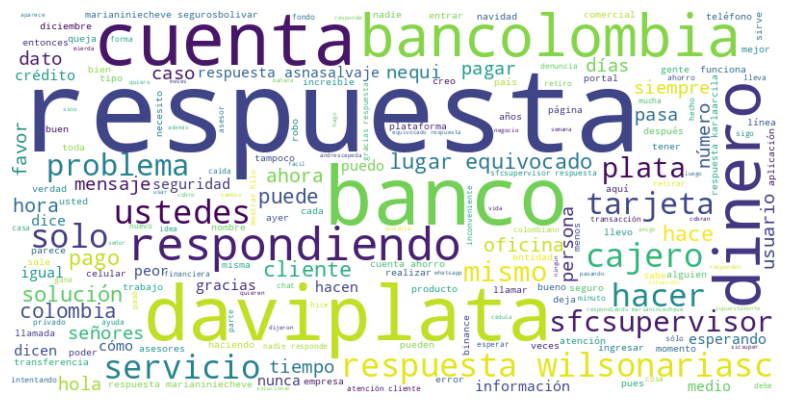

In [17]:
tokens_sin_davivienda = [token for token in lemmatized_tokens if token.lower() != 'davivienda']

# Convertir la lista de tokens en un solo texto
texto = ' '.join(tokens_sin_davivienda)

# Configuración de la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Visualización de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Matriz termino-documento - Document-Term Matrix

In [18]:
!pip install --upgrade scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
documentos = lemmatized_tokens

# Configuración del vectorizador de términos
vectorizador = CountVectorizer()
matriz_dtm = vectorizador.fit_transform(documentos)

# Obtener los términos y los documentos
terminos = vectorizador.get_feature_names_out()
# Imprimir la matriz DTM
print(matriz_dtm.toarray())

# Imprimir los términos
print(terminos)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aaaah' 'aabenedetti' 'abierta' ... 'única' 'únicamente' 'único']


In [20]:
#documentos = lemmatized_tokens
# Crear el vectorizador y ajustarlo a los documentos
#vectorizador = CountVectorizer(stop_words=['davivienda'])#excluye 'davivienda' considerando que es la palabra filtro de todos los tweets
#matriz_dtm = vectorizador.fit_transform(documentos)

# Obtener los términos (palabras) en la matriz DTM
#terminos = vectorizador.get_feature_names_out()
#nombres_documentos = [str(i) for i in range(matriz_dtm.shape[0])]
# Calcular la frecuencia de cada término
#frecuencia_terminos = matriz_dtm.sum(axis=0).A1

# Definir umbral de frecuencia para seleccionar los términos más frecuentes
#umbral_frecuencia = 150

# Obtener los índices de los términos más frecuentes
#indices_terminos_frecuentes = [i for i, frecuencia in enumerate(frecuencia_terminos) if frecuencia >= umbral_frecuencia]

# Filtrar la matriz DTM y los términos para incluir solo los términos más frecuentes
#matriz_dtm_resumida = matriz_dtm[:, indices_terminos_frecuentes]
#terminos_resumidos = [terminos[i] for i in indices_terminos_frecuentes]
#El siguiente código es para que se muestren todos los resultados de la matriz y así poder tener una mejor observación de los resultados
#np.set_printoptions(threshold=np.inf)
# Imprimir la matriz DTM resumida
#print(matriz_dtm_resumida.toarray())

# Imprimir los términos resumidos
#print(terminos_resumidos)

In [21]:
#dtm_df = pd.DataFrame(matriz_dtm.toarray(), columns=terminos, index=nombres_documentos)
#Obtener el número de documentos más frecuentes que deseas mostrar
#num_documentos_mas_frecuentes = 5
#num_terminos_mas_frecuentes = 5  # Número de términos más frecuentes a mostrar

# Resumir el DataFrame mostrando solo los documentos más frecuentes
#resumen_df = dtm_df.head(num_documentos_mas_frecuentes)
# Resumir el DataFrame por los documentos más frecuentes y términos más frecuentes
#resumen_df = dtm_df.sum().nlargest(num_terminos_mas_frecuentes).to_frame().T
#resumen_df = pd.concat([resumen_df, dtm_df.head(num_documentos_mas_frecuentes)])

# Imprimir el DataFrame resumido
#print(resumen_df)

In [22]:
# Crear el mapa de calor
#matriz_dtm_densa = matriz_dtm.toarray()
#sns.heatmap(matriz_dtm_densa, cmap="YlGnBu")
#plt.title("Mapa de calor de la matriz término-documento")
#plt.xlabel("Términos")
#plt.ylabel("Documentos")
#plt.show()

In [28]:
import networkx as nx
from scipy.sparse import csr_matrix
import random

In [37]:
# Convertir la matriz dispersa en una matriz comprimida en filas (csr_matrix)
"""matriz_termdoc_csr = csr_matrix(matriz_dtm)

# Crear un grafo vacío
grafo = nx.Graph()

# Definir el número máximo de aristas a incluir en el grafo
max_num_aristas = 1000

# Obtener las aristas y sus pesos basados en las co-ocurrencias de términos
aristas = []
for i in range(matriz_termdoc_csr.shape[0]):
    for j in range(i + 1, matriz_termdoc_csr.shape[0]):
        co_ocurrencias = matriz_termdoc_csr[i].multiply(matriz_termdoc_csr[j]).sum()
        if co_ocurrencias > 0:
            aristas.append((i, j, co_ocurrencias))

# Seleccionar una muestra aleatoria de aristas
if len(aristas) > max_num_aristas:
    aristas = random.sample(aristas, max_num_aristas)

# Agregar los términos como nodos
for i, termino in enumerate(terminos):
    grafo.add_node(i, label=termino)

# Agregar las aristas al grafo
for arista in aristas:
    i, j, peso = arista
    grafo.add_edge(i, j, weight=peso)

# Definir la posición de los nodos en el gráfico utilizando un algoritmo de distribución rápido
pos = nx.random_layout(grafo)

# Dibujar el gráfico de red
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(grafo, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_edges(grafo, pos, alpha=0.3)
nx.draw_networkx_labels(grafo, pos, font_size=8)
plt.title('Gráfico de Red de Términos')
plt.axis('off')
plt.show()"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"matriz_termdoc_csr = csr_matrix(matriz_dtm)\n\n# Crear un grafo vacío\ngrafo = nx.Graph()\n\n# Definir el número máximo de aristas a incluir en el grafo\nmax_num_aristas = 1000\n\n# Obtener las aristas y sus pesos basados en las co-ocurrencias de términos\naristas = []\nfor i in range(matriz_termdoc_csr.shape[0]):\n    for j in range(i + 1, matriz_termdoc_csr.shape[0]):\n        co_ocurrencias = matriz_termdoc_csr[i].multiply(matriz_termdoc_csr[j]).sum()\n        if co_ocurrencias > 0:\n            aristas.append((i, j, co_ocurrencias))\n\n# Seleccionar una muestra aleatoria de aristas\nif len(aristas) > max_num_aristas:\n    aristas = random.sample(aristas, max_num_aristas)\n\n# Agregar los términos como nodos\nfor i, termino in enumerate(terminos):\n    grafo.add_node(i, label=termino)\n\n# Agregar las aristas al grafo\nfor arista in aristas:\n    i, j, peso = arista\n    grafo.add_edge(i, j, weight=peso)\n\n# Definir la posición de los nodos en el gráfico utilizando un algoritmo de

## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [30]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [31]:
# Convertir cada documento en una lista de tokens
documentos_tokenizados = [texto.split() for texto in tokens_sin_davivienda]

# Crear un diccionario a partir de los tokens lematizados
dictionary = Dictionary(documentos_tokenizados)

# Crear un corpus (representación vectorial) a partir del diccionario
corpus = [dictionary.doc2bow(tokens) for tokens in documentos_tokenizados]

# Definir el número de tópicos deseados
num_topics = 10

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Imprimir los tópicos y las palabras más representativas de cada tópico
for topic in lda_model.show_topics():
    print(topic)

(0, '0.086*"bancolombia" + 0.044*"favor" + 0.034*"mensaje" + 0.031*"pasa" + 0.027*"hacen" + 0.027*"millones" + 0.025*"información" + 0.021*"horas" + 0.020*"sacar" + 0.019*"buenas"')
(1, '0.430*"respuesta" + 0.029*"colombia" + 0.027*"crédito" + 0.021*"ahora" + 0.017*"poder" + 0.017*"esperando" + 0.013*"país" + 0.013*"pago" + 0.012*"dice" + 0.010*"mañana"')
(2, '0.086*"respondiendo" + 0.041*"tarjeta" + 0.040*"cuentas" + 0.039*"gracias" + 0.034*"cliente" + 0.026*"puede" + 0.025*"puedo" + 0.025*"oficina" + 0.022*"seguridad" + 0.015*"después"')
(3, '0.067*"solución" + 0.054*"servicio" + 0.048*"nadie" + 0.043*"días" + 0.033*"http" + 0.029*"siempre" + 0.027*"ahorros" + 0.021*"sabe" + 0.018*"hora" + 0.017*"veces"')
(4, '0.049*"atención" + 0.031*"línea" + 0.028*"clientes" + 0.024*"teléfono" + 0.018*"buenos" + 0.018*"pues" + 0.017*"atentos" + 0.017*"mientras" + 0.015*"sale" + 0.014*"señor"')
(5, '0.059*"hace" + 0.049*"lugar" + 0.045*"solo" + 0.041*"bancos" + 0.029*"señores" + 0.027*"hola" + 0.02

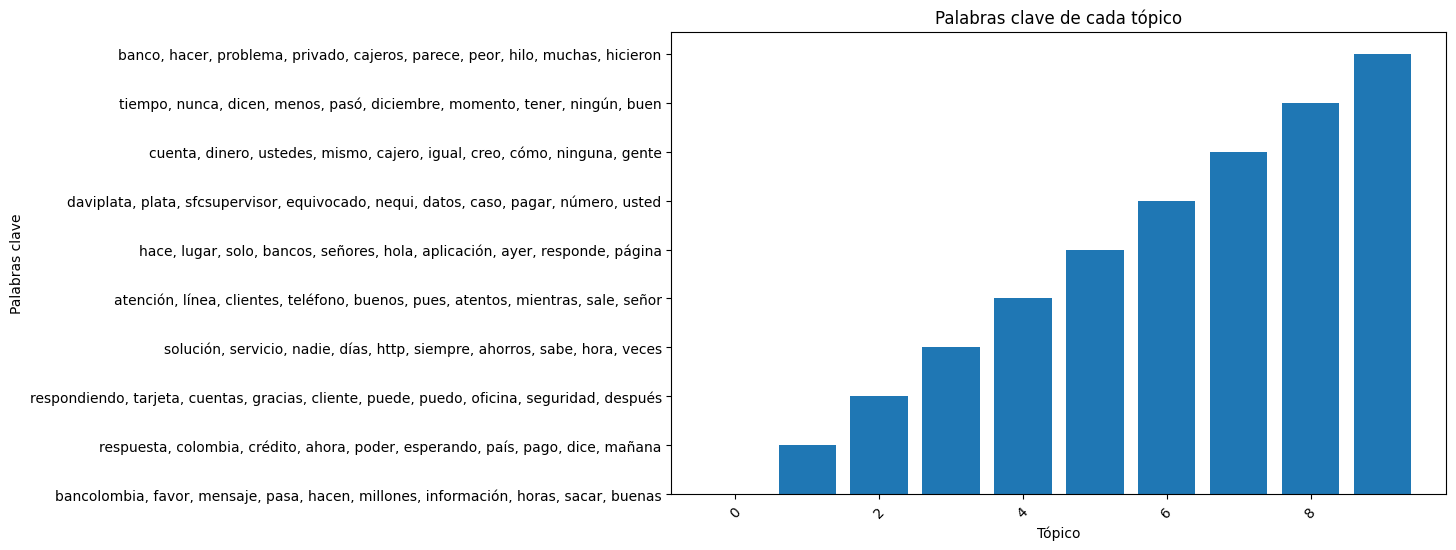

In [33]:
# Obtener las palabras clave y pesos de cada tópico
topic_keywords = lda_model.show_topics(num_topics=num_topics, num_words=5)  # Obtener las 5 palabras clave por tópico

# Crear una lista de tópicos y palabras clave
topics = [topic for topic, _ in topic_keywords]
keywords = [', '.join([word for word, _ in lda_model.show_topic(topic)]) for topic in topics]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(topics, keywords)
plt.xlabel('Tópico')
plt.ylabel('Palabras clave')
plt.title('Palabras clave de cada tópico')
plt.xticks(rotation=45)
plt.show()

In [34]:
!pip install pyLDAvis
!pip install --upgrade pyLDAvis
import pyLDAvis
import gensim.corpora as corpora
import pyLDAvis.gensim_models as gensimvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
vis_data = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 7. Interpretación de Resultados y conclusiones generales.